<a href="https://colab.research.google.com/github/AmiraBelkis/Neural-Network-Reduction-via-Knowledge-Transfer/blob/main/MNIST/AG_SimpleCNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rssrc

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Jul 24 18:24:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


# Importer

## Bibliothèques

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import random
import string
import torch
from torch import nn
import torch.nn.utils.prune as prune
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import matplotlib.colors as colors
import numpy as np
from copy import deepcopy

In [ ]:
import AG

100%|██████████| 9912422/9912422 [00:00<00:00, 481545915.41it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 38664441.05it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 138251467.23it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22518355.52it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
import importlib
importlib.reload(AG)

<module 'AG' from '/content/AG.py'>

# AG

In [ ]:
model_path = '/content/drive/Shareddrives/PFE 22 23 Feliachi et Frioui/..Tests/Models/MNIST/SimpleCNN_mnist'
model_base = torch.load(model_path)

In [ ]:
AG.evaluation_2(model_base , nn.CrossEntropyLoss())

Accuracy: 97.93%
Loss: 0.0648


(0.9793, 0.06478250494811115)

In [ ]:
model_base.to(AG.device)

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=128, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

## Méthode AG

In [ ]:
save_to = '/content/drive/Shareddrives/PFE 22 23 Feliachi et Frioui/..Tests/MNIST/SimpleCNN/'
os.makedirs(save_to, exist_ok=True)
os.makedirs(save_to +'children/', exist_ok=True)
os.makedirs(save_to +'kd/', exist_ok=True)
os.makedirs(save_to +'kd/training/', exist_ok=True)

Generating the initial population :
     - individual 0 ----------- 100%
     - individual 1 ----------- 100%
     - individual 2 ----------- 100%
     - individual 3 ----------- 100%
     - individual 4 ----------- 100%
     - individual 5 ----------- 100%
     - individual 6 ----------- 100%
     - individual 7 ----------- 100%
Performing KD on the initial population :
------------------------------ Training 1 ---------------------------------
Epoch 0/4
----------
train Loss: 3.0010 Acc: 0.4577
val Loss: 1.4073 Acc: 0.8779

Epoch 1/4
----------
train Loss: 1.1564 Acc: 0.9075
val Loss: 0.9974 Acc: 0.9316

Epoch 2/4
----------
train Loss: 0.9248 Acc: 0.9321
val Loss: 0.8485 Acc: 0.9376

Epoch 3/4
----------
train Loss: 0.8227 Acc: 0.9421
val Loss: 0.8197 Acc: 0.9428

Epoch 4/4
----------
train Loss: 0.7606 Acc: 0.9473
val Loss: 0.7434 Acc: 0.9493

Training complete in 15m 56s
Best val Acc: 0.949300
------------------------------ Training 2 ---------------------------------
Epoch 0/4
--

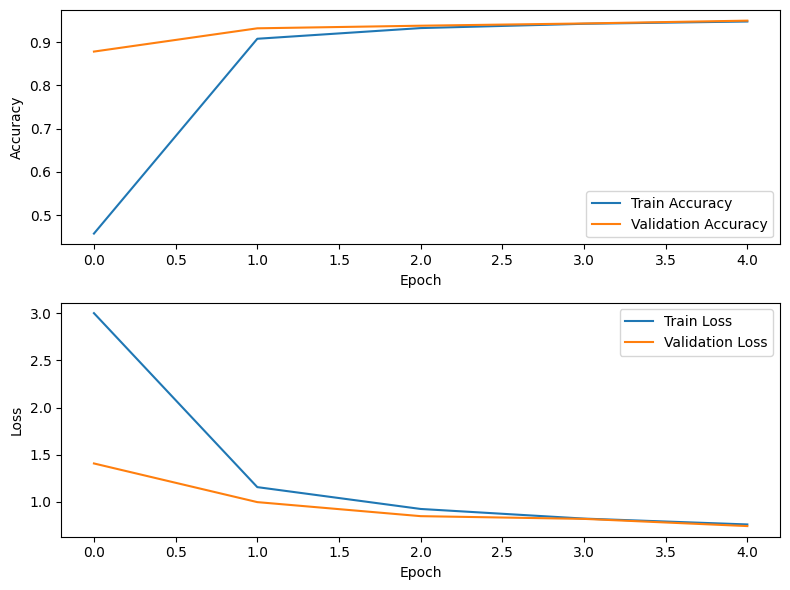

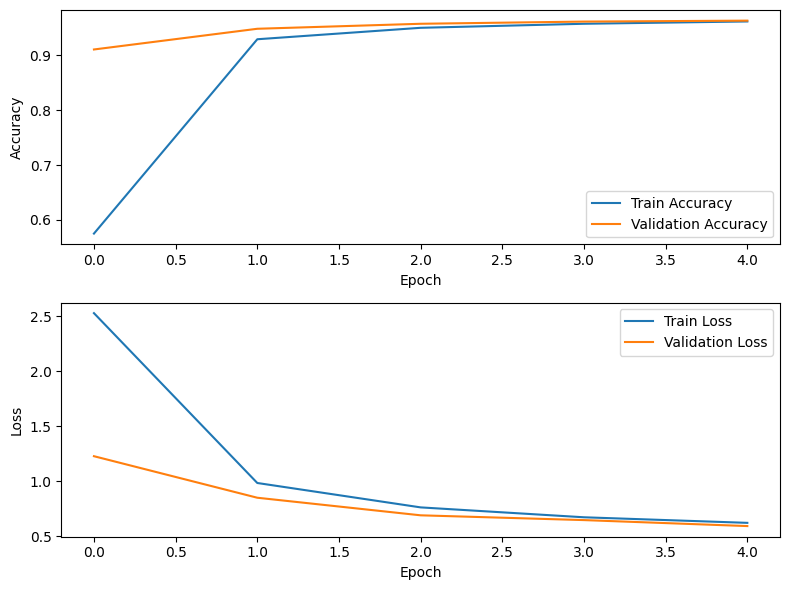

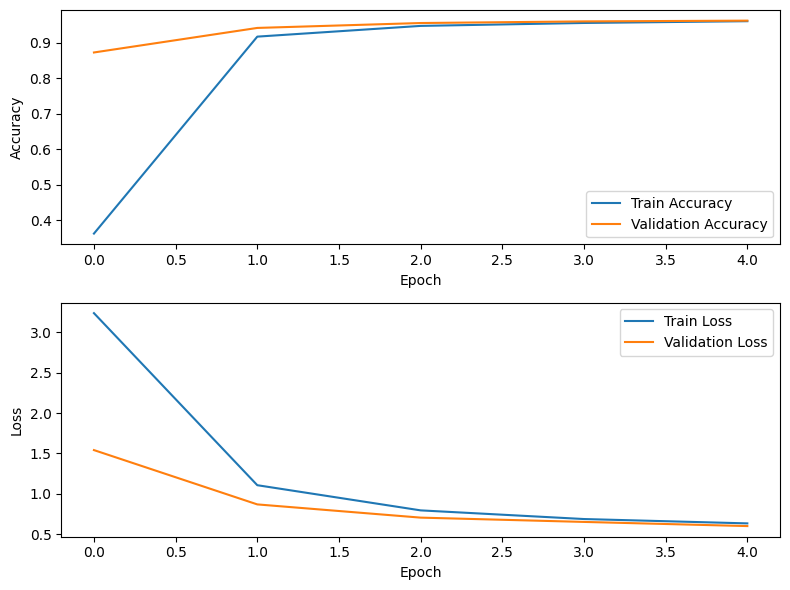

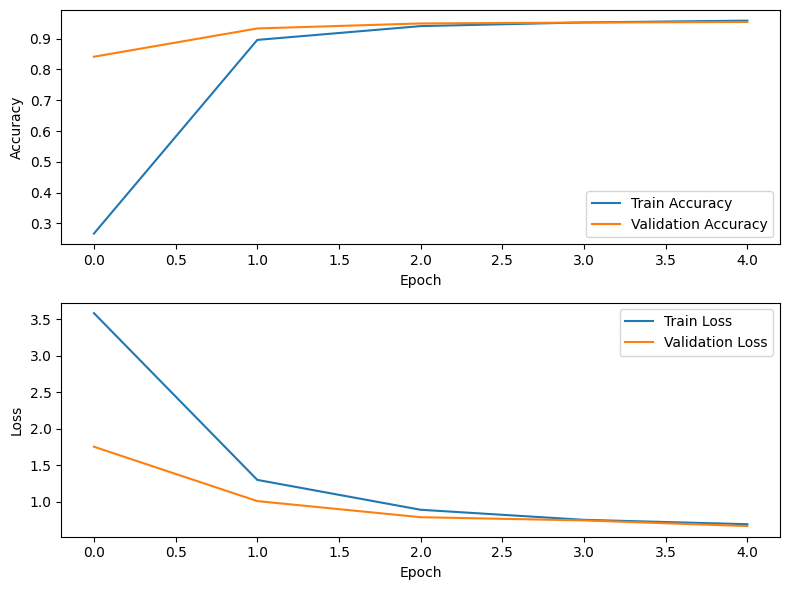

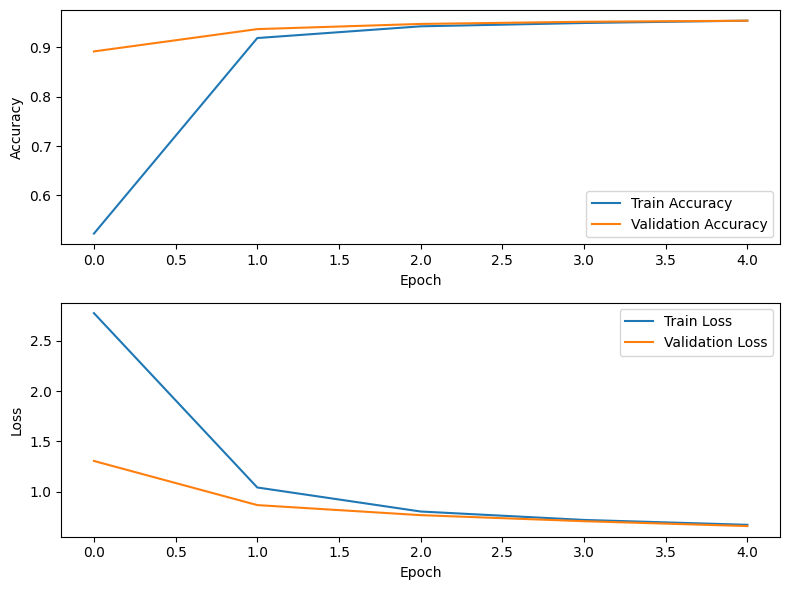

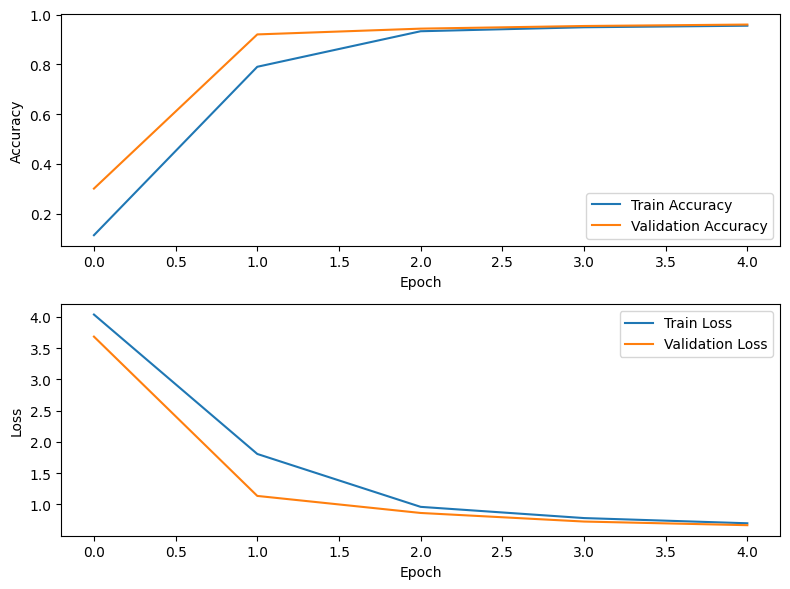

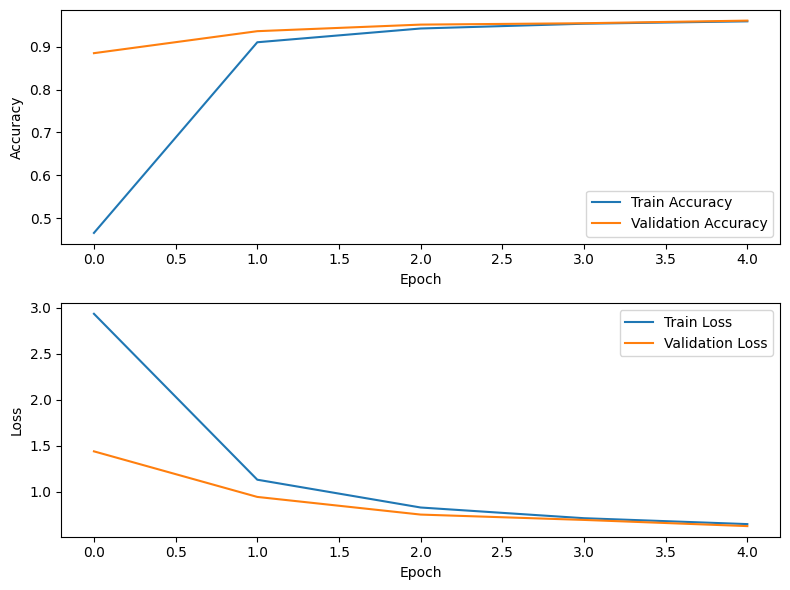

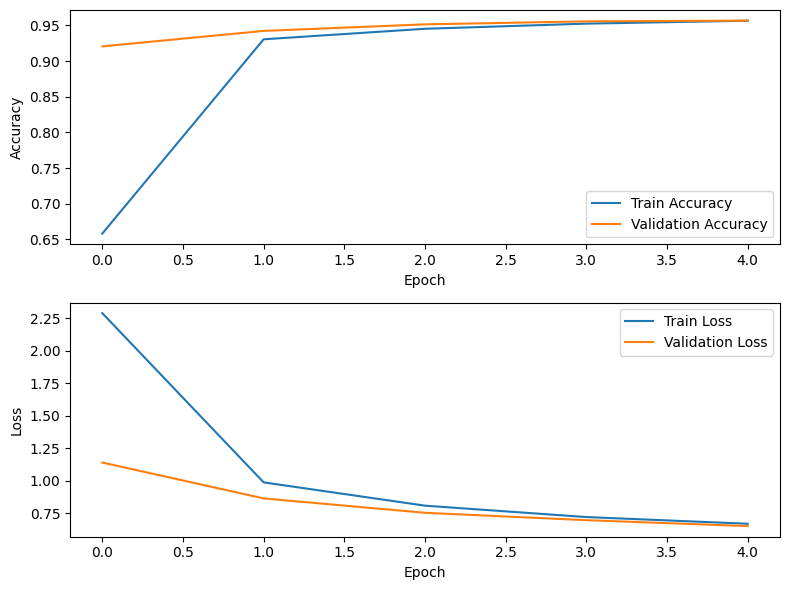

/*-----------------------------*/
/*         iteration 1        */
/*-----------------------------*/
   * Select parent for crossing:
       - Selection --------------- 100%
   * Offspring:
       - Crossover:
           mask : [0, 0, 1, 0]
       - mutation:
       - Crossover:
           mask : [0, 1, 0, 1]
       - mutation:
       - Performing KD on the children :
------------------------------ Training 1 ---------------------------------
Epoch 0/4
----------
train Loss: 1.0378 Acc: 0.9148
val Loss: 0.7466 Acc: 0.9501

Epoch 1/4
----------
train Loss: 0.7127 Acc: 0.9514
val Loss: 0.6687 Acc: 0.9557

Epoch 2/4
----------
train Loss: 0.6451 Acc: 0.9565
val Loss: 0.6248 Acc: 0.9575

Epoch 3/4
----------
train Loss: 0.6080 Acc: 0.9595
val Loss: 0.5901 Acc: 0.9584

Epoch 4/4
----------
train Loss: 0.5844 Acc: 0.9617
val Loss: 0.5784 Acc: 0.9597

Training complete in 15m 32s
Best val Acc: 0.959700
------------------------------ Training 2 ---------------------------------
Epoch 0/4
-----

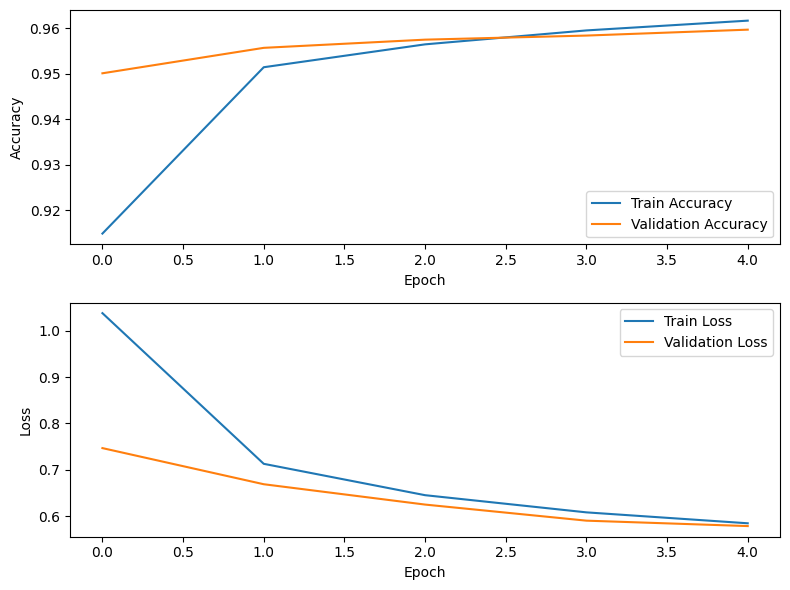

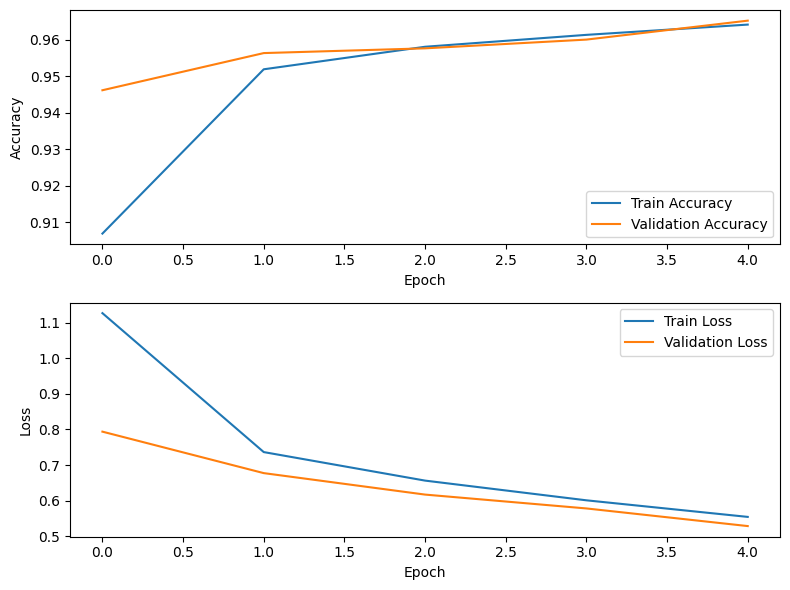

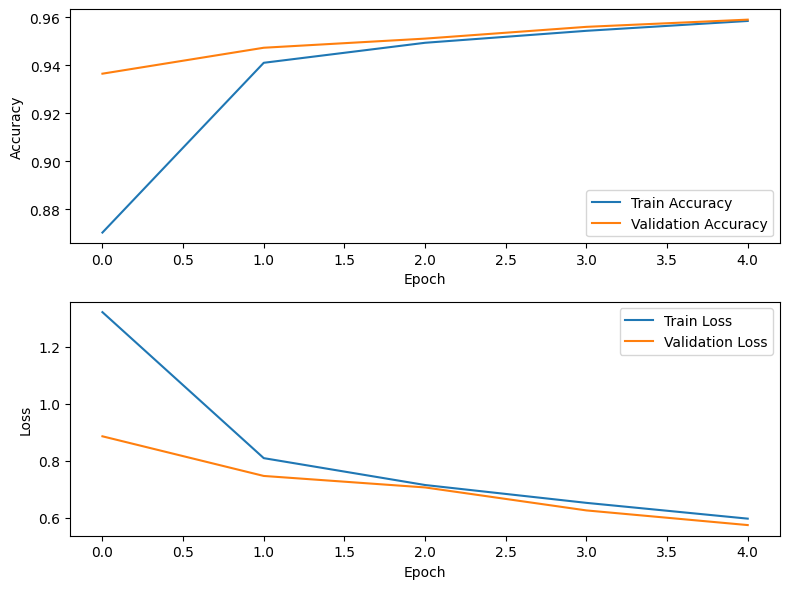

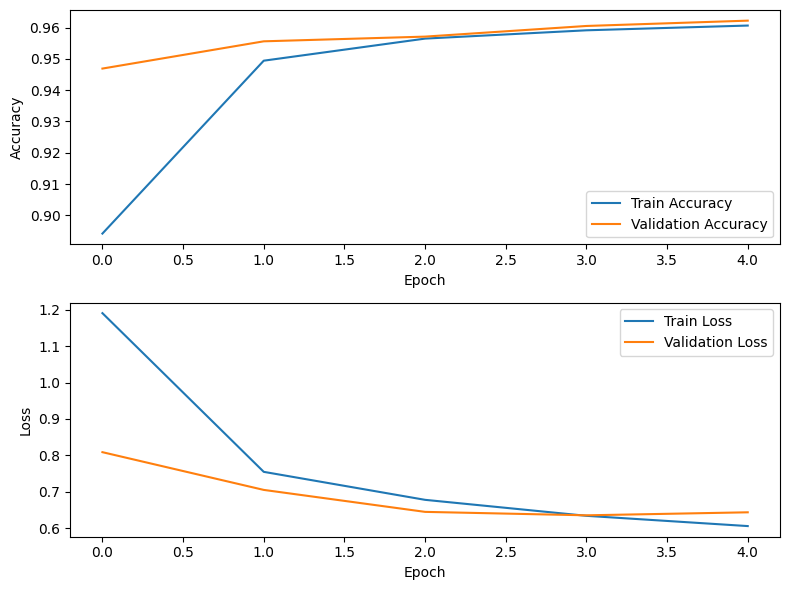

Select the winning ticket from final population
  - Selection --------------- 100%


In [ ]:
winning_ticket = AG.AG_method(model_base, save_to, nb_itr = 2, N = 8 ,pruning_rate = 0.85, pruning_space = 0.05,kd_epoch = 5)

## Évaluer le ticket gagnant

In [ ]:
winning_ticket = torch.load( save_to + 'winning_ticket')

In [ ]:
AG.calculate_sparsity(winning_ticket)

tensor(0.8500, device='cuda:0')

In [ ]:
AG.evaluation_2(winning_ticket, nn.CrossEntropyLoss())

Accuracy: 96.53%
Loss: 0.1074


(0.9653, 0.10743577596820464)

In [ ]:
data = AG.dataloaders['val']
for in_ , lbl in data:
  in_ = in_.to(AG.device)
  lbl = lbl.to(AG.device)
  out = winning_ticket(in_)
  _, preds = torch.max(out, 1)
  print(preds)
  print('-'*10)
  print(lbl)
  print('-'*10)
  print(preds-lbl)
  break

tensor([1, 1, 4, 9, 4, 5, 1, 8, 8, 4, 1, 1, 3, 6, 3, 6, 4, 4, 8, 2, 8, 4, 0, 7,
        5, 7, 0, 7, 7, 1, 7, 6, 3, 9, 4, 1, 8, 1, 9, 6, 8, 8, 9, 2, 9, 5, 4, 2,
        1, 8, 4, 0, 6, 3, 8, 3, 6, 1, 7, 2, 8, 1, 3, 9], device='cuda:0')
----------
tensor([1, 1, 4, 9, 4, 5, 1, 9, 8, 4, 1, 1, 3, 6, 3, 6, 4, 4, 8, 2, 8, 4, 0, 7,
        5, 7, 0, 7, 7, 1, 7, 6, 3, 9, 4, 1, 8, 1, 9, 6, 8, 8, 9, 2, 9, 5, 4, 2,
        1, 8, 4, 0, 6, 3, 8, 3, 6, 1, 7, 2, 8, 1, 3, 9], device='cuda:0')
----------
tensor([ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0], device='cuda:0')
